In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['price'] = boston.target

In [3]:
bos = bos.sample(frac = 1, random_state = 3)

In [6]:
y = bos['price']
X = bos.drop('price', axis = 1)

In [5]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet,ElasticNetCV

In [17]:
lasso = Lasso(alpha = .5)
lasso.fit(X,y)
lasso.coef_

array([-0.0832894 ,  0.04954355, -0.0052532 ,  0.        , -0.        ,
        2.49821246,  0.00360438, -0.93660469,  0.27745115, -0.01544219,
       -0.75875211,  0.00946855, -0.6562895 ])

In [18]:
pd.DataFrame(lasso.coef_, index = X.columns, columns = ['coeffs'])

,coeffs
CRIM,-0.083289
ZN,0.049544
INDUS,-0.005253
CHAS,0.000000
NOX,-0.000000
RM,2.498212
AGE,0.003604
DIS,-0.936605
RAD,0.277451
TAX,-0.015442


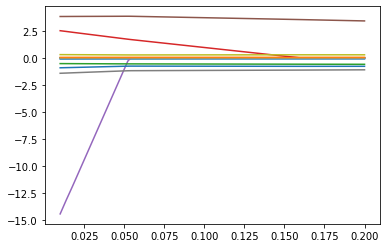

In [24]:
coefs = []
alphas = np.linspace(0.01, 0.2, 100)

for a in alphas:
    
    lasso = Lasso(alpha = a)
    lasso.fit(X,y)
    coefs.append(lasso.coef_)

plt.plot(alphas, coefs)
plt.show()

The above figure illustrates the behaviour of Lasso Regularization. It shows that as we increase alpha, it sets more and more coefficients to zero.

### Hyperparameter tuning to find the best alpha (penality term) for this data

In [73]:
alphas = np.linspace(0.0001, 1, 50)

lasso_cv = LassoCV(alphas = alphas, cv = 3, random_state = 3, max_iter = 10000)
lasso_cv.fit(X,y)

LassoCV(alphas=array([1.00000000e-04, 2.05061224e-02, 4.09122449e-02, 6.13183673e-02,
       8.17244898e-02, 1.02130612e-01, 1.22536735e-01, 1.42942857e-01,
       1.63348980e-01, 1.83755102e-01, 2.04161224e-01, 2.24567347e-01,
       2.44973469e-01, 2.65379592e-01, 2.85785714e-01, 3.06191837e-01,
       3.26597959e-01, 3.47004082e-01, 3.67410204e-01, 3.87816327e-01,
       4.08222449e-01, 4.28628571e-0...
       7.34720408e-01, 7.55126531e-01, 7.75532653e-01, 7.95938776e-01,
       8.16344898e-01, 8.36751020e-01, 8.57157143e-01, 8.77563265e-01,
       8.97969388e-01, 9.18375510e-01, 9.38781633e-01, 9.59187755e-01,
       9.79593878e-01, 1.00000000e+00]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=10000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=3, selection='cyclic', tol=0.0001,
        verbose=False)

In [74]:
lasso_cv.alpha_

0.0001

Lasso CV chose 0.0001 as the best alpha (lowest in the range). Such a low value

In [75]:
X['CRIM2'] = np.square(X['CRIM'])
X['CRIM3'] = X['CRIM']**3
X['CRIM4'] = X['CRIM']**4

X['AGE2'] = np.square(X['AGE'])
X['AGE3'] = X['AGE']**3
X['AGE4'] = X['AGE']**4


In [76]:
lasso_cv.coef_

array([-1.07993501e-01,  4.64247572e-02,  2.04177418e-02,  2.68491110e+00,
       -1.77328270e+01,  3.80991359e+00,  6.66335859e-04, -1.47503617e+00,
        3.05973840e-01, -1.23375103e-02, -9.52382775e-01,  9.31343097e-03,
       -5.24814591e-01])

In [78]:
pd.DataFrame(lasso_cv.coef_, index = X.columns, columns = ['coeffs'])

ValueError: Shape of passed values is (13, 1), indices imply (19, 1)

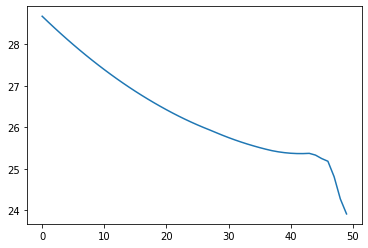

In [79]:
mse_path = lasso_cv.mse_path_.mean(1)

plt.plot(mse_path)

### Ridge Regularization

In [86]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['price'] = boston.target

bos = bos.sample(frac = 1, random_state = 3)

y = bos['price']
X = bos.drop('price', axis = 1)

In [87]:
ridge_alphas = np.logspace(-2, -1, 100)

ridge_cv = RidgeCV(alphas = ridge_alphas,  store_cv_values = True)

ridge_cv.fit(X,y)

RidgeCV(alphas=array([0.01      , 0.01023531, 0.01047616, 0.01072267, 0.01097499,
       0.01123324, 0.01149757, 0.01176812, 0.01204504, 0.01232847,
       0.01261857, 0.0129155 , 0.01321941, 0.01353048, 0.01384886,
       0.01417474, 0.01450829, 0.01484968, 0.01519911, 0.01555676,
       0.01592283, 0.01629751, 0.01668101, 0.01707353, 0.01747528,
       0.0178865 , 0.01830738, 0.01873817, 0.0191791 , 0.01963041,
       0.02009...
       0.05722368, 0.05857021, 0.05994843, 0.06135907, 0.06280291,
       0.06428073, 0.06579332, 0.06734151, 0.06892612, 0.07054802,
       0.07220809, 0.07390722, 0.07564633, 0.07742637, 0.07924829,
       0.08111308, 0.08302176, 0.08497534, 0.0869749 , 0.08902151,
       0.09111628, 0.09326033, 0.09545485, 0.097701  , 0.1       ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [88]:
ridge_cv.alpha_

0.03678379771828634

In [89]:
ridge_cv.coef_

array([-1.07805433e-01,  4.64781001e-02,  1.88138776e-02,  2.68045230e+00,
       -1.73526918e+01,  3.81310803e+00,  3.24037719e-04, -1.46946799e+00,
        3.05078019e-01, -1.23674079e-02, -9.48157516e-01,  9.33326990e-03,
       -5.25217160e-01])

In [90]:
pd.DataFrame(ridge_cv.coef_, index = X.columns, columns = ['coeffs'])

,coeffs
CRIM,-0.107805
ZN,0.046478
INDUS,0.018814
CHAS,2.680452
NOX,-17.352692
RM,3.813108
AGE,0.000324
DIS,-1.469468
RAD,0.305078
TAX,-0.012367


In [91]:
ridge_cv.cv_values_.mean(0)

array([23.72547778, 23.72547254, 23.72546722, 23.72546184, 23.72545638,
       23.72545085, 23.72544525, 23.72543958, 23.72543384, 23.72542804,
       23.72542217, 23.72541624, 23.72541025, 23.7254042 , 23.72539809,
       23.72539193, 23.72538571, 23.72537945, 23.72537315, 23.7253668 ,
       23.72536042, 23.72535401, 23.72534756, 23.7253411 , 23.72533462,
       23.72532813, 23.72532163, 23.72531513, 23.72530865, 23.72530217,
       23.72529573, 23.72528931, 23.72528294, 23.72527662, 23.72527037,
       23.72526418, 23.72525809, 23.72525209, 23.7252462 , 23.72524044,
       23.72523481, 23.72522935, 23.72522405, 23.72521895, 23.72521405,
       23.72520939, 23.72520497, 23.72520083, 23.72519698, 23.72519345,
       23.72519026, 23.72518745, 23.72518504, 23.72518306, 23.72518154,
       23.72518052, 23.72518003, 23.72518011, 23.7251808 , 23.72518214,
       23.72518417, 23.72518694, 23.72519049, 23.72519488, 23.72520015,
       23.72520637, 23.72521359, 23.72522187, 23.72523127, 23.72

Text(0, 0.5, 'MSE')

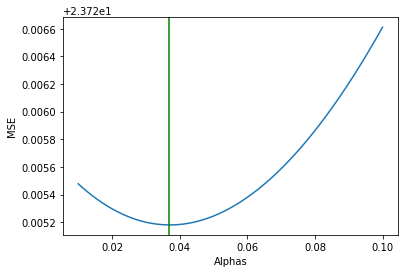

In [92]:
plt.plot( ridge_cv.alphas, ridge_cv.cv_values_.mean(0))
plt.axvline(ridge_cv.alpha_, c = 'g')
plt.xlabel('Alphas')
plt.ylabel('MSE')

### Elastic Net Regularization

In [93]:
np.linspace(0.01, 1, 10)

array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])

In [94]:
np.logspace(-2, 0, 10)

array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ])

In [96]:
alphas = np.logspace(-4, 0, 100)

en_cv = ElasticNetCV(alphas = alphas, cv = 3, random_state = 3)
en_cv.fit(X, y)

ElasticNetCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.054802...
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
             copy_X=True, cv=3, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=3,
             selection='cyclic', tol=0.0001, verbose=0)

In [97]:
en_cv.alpha_

0.0001

Since optimal Alpha is hitting the boundary at the lowest level, we can conclude that Elastic Net Regularizaion is not required for this model.